# Homework 1 Econometrics 
## Mohammed Meftah & Binxiang Xiang


### Data loading 

In [2]:
bwages <- read.csv('bwages.dat',sep = '\t')

In [3]:
variables_to_keep <- c('WAGE','EDUC','MALE','EXPER')
bwages <- bwages[,variables_to_keep]

# rename columns with lowercase 
colnames(bwages) <- c('wage','educ','male','exper')

# format male column to factor 
#bwages$male <- as.factor(bwages$male)

In [4]:
# show first lines of data 
head(bwages)

wage,educ,male,exper
7.780208,1,1,23
4.818505,1,0,15
10.563645,1,1,31
7.042429,1,1,32
7.887521,1,1,9
8.200058,1,0,15


#### 1. Descriptive statistics for variables

* Number of observations

In [5]:
print(dim(bwages)[1])

[1] 1472


* Descriptive statistics

In [6]:
summary(bwages)

      wage             educ            male            exper      
 Min.   : 2.191   Min.   :1.000   Min.   :0.0000   Min.   : 0.00  
 1st Qu.: 8.113   1st Qu.:3.000   1st Qu.:0.0000   1st Qu.: 9.00  
 Median :10.127   Median :3.000   Median :1.0000   Median :16.50  
 Mean   :11.051   Mean   :3.378   Mean   :0.6067   Mean   :17.22  
 3rd Qu.:12.755   3rd Qu.:4.000   3rd Qu.:1.0000   3rd Qu.:24.00  
 Max.   :47.576   Max.   :5.000   Max.   :1.0000   Max.   :47.00  

#### 2. Create dummy variables for educ

In [7]:
# with transformation to factor
educ1 <- ifelse(bwages$educ==1,1,0)
educ2 <- ifelse(bwages$educ==2,1,0)
educ3 <- ifelse(bwages$educ==3,1,0)
educ4 <- ifelse(bwages$educ==4,1,0)

We do not need to create educ5 because this case is covered when educ1, educ2, educ3 and educ4 equal zero.

* Concatenate to bwages 

In [8]:
bwages <- cbind(bwages,educ1,educ2,educ3,educ4)

In [9]:
summary(bwages)

      wage             educ            male            exper      
 Min.   : 2.191   Min.   :1.000   Min.   :0.0000   Min.   : 0.00  
 1st Qu.: 8.113   1st Qu.:3.000   1st Qu.:0.0000   1st Qu.: 9.00  
 Median :10.127   Median :3.000   Median :1.0000   Median :16.50  
 Mean   :11.051   Mean   :3.378   Mean   :0.6067   Mean   :17.22  
 3rd Qu.:12.755   3rd Qu.:4.000   3rd Qu.:1.0000   3rd Qu.:24.00  
 Max.   :47.576   Max.   :5.000   Max.   :1.0000   Max.   :47.00  
     educ1             educ2          educ3            educ4       
 Min.   :0.00000   Min.   :0.00   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.00000   1st Qu.:0.00   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :0.00000   Median :0.00   Median :0.0000   Median :0.0000  
 Mean   :0.06726   Mean   :0.18   Mean   :0.2853   Mean   :0.2418  
 3rd Qu.:0.00000   3rd Qu.:0.00   3rd Qu.:1.0000   3rd Qu.:0.0000  
 Max.   :1.00000   Max.   :1.00   Max.   :1.0000   Max.   :1.0000  

#### 3. OLS model

In [10]:
model_1 <- lm(wage~male+educ1+educ2+educ3+educ4+exper,data=bwages)

* Estimated model

In [11]:
summary(model_1)


Call:
lm(formula = wage ~ male + educ1 + educ2 + educ3 + educ4 + exper, 
    data = bwages)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.6859  -1.8975  -0.2973   1.5425  30.5328 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 10.401010   0.259946  40.012  < 2e-16 ***
male         1.300905   0.194696   6.682 3.35e-11 ***
educ1       -7.904926   0.420969 -18.778  < 2e-16 ***
educ2       -6.089686   0.298745 -20.384  < 2e-16 ***
educ3       -4.244575   0.261643 -16.223  < 2e-16 ***
educ4       -2.417478   0.272185  -8.882  < 2e-16 ***
exper        0.190744   0.009644  19.779  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.548 on 1465 degrees of freedom
Multiple R-squared:  0.367,	Adjusted R-squared:  0.3644 
F-statistic: 141.5 on 6 and 1465 DF,  p-value: < 2.2e-16


#### 4. Coefficients interpretation

First of all, we can see that each of the estimated coefficient is significant.

* The intercept $\beta_0$ = 10.40 corresponds to the gross hourly wage of a woman (male=0) with a high education level (educ=5) and no experience (exper=0).

* For exper and educ fixed, $\beta_1$ = 1.30 is the additional amount of gross hourly wage a man will earn compared to a woman.

* For male and exper fixed, $\beta_2$ = -7.90 is the 'additional' amount of gross hourly wage someone with educ = 1 will earn compared to someone with educ = 5. As $\beta_2$ is negative, so the person with educ=1 will actually earn $|\beta_2|$ less.

* For male and exper fixed, $\beta_3$ = -6.09 is the 'additional' amount of gross hourly wage someone with educ = 2 will earn compared to someone with educ = 5. As $\beta_3$ is negative, so the person with educ=2 will actually earn $|\beta_3|$ less. 

* For male and exper fixed, $\beta_4$ = -4.24 is the 'additional' amount of gross hourly wage someone with educ = 3 will earn compared to someone with educ = 5. As $\beta_4$ is negative, so the person with educ=3 will actually earn $|\beta_4|$ less. 

* For male and exper fixed, $\beta_5$ = -2.42 is the 'additional' amount of gross hourly wage someone with educ = 4 will earn compared to someone with educ = 5. As $\beta_5$ is negative, so the person with educ=4 will actually earn $|\beta_5|$ less. 

* For male and educ fixed, $\beta_6$ = 0.19 is the additional amount of gross hourly wage someone will earn with a additional year of experience.

#### 5.  

As we said in 2., it's because the case educ = 5 is covered when educ1 = 0, educ2 = 0, educ3 = 0 and educ4 =0. That's why we interpret the previous coefficients for educ dummy variables to the case educ = 5.

#### 6. 

We suppose that educ = 5 corresponds to a university level. Then the expected salary $W_1$ for a man with an university level education is : $W_1 = \beta_0 + \beta_1 + \beta_6exper \approx 11.7 + 0.19exper $.

Then if the man has 10 years of experience, he should expect to earn 13.6 per hour (gross).


#### 7. Z tests

Let be i $\in [0,1,2,3,4,5,6]$, 

We want to test the significancy of $\beta_i$ with the following hypotheses : 
* The null hypothesis $H_0$ is $\beta_i$ = 0.
* The alternative hypothesis $H_1$ is $\beta_i \neq$ 0.

We can then compute the Z-test as $Z_i = Z(\beta_i) = \frac{\beta_i-0}{SE(\beta_i)}$, where $SE(\beta_i)$ is the standard error of $\beta_i$.

We note with $Z_{\alpha = 0.05} = 2.96$ the absolute critical value for 5 % significancy. Then if $|Z_i| \geq Z_{\alpha = 0.05}$, we can reject the null hypothesis with 5 % significancy.


We can now compute, with coefficient values and standard error SE or just read the results of 3. in the t-value column, the Z-test for our coefficients : 

* $Z_0$ = 40 > $Z_{\alpha = 0.05}$, we can reject the null with 5% significancy level.
* $Z_1$ = 6.68 > $Z_{\alpha = 0.05}$, we can reject the null with 5% significancy level.
* $|Z_2|$ = 18.78 > $Z_{\alpha = 0.05}$, we can reject the null with 5% significancy level.
* $|Z_3|$ = 20.38 > $Z_{\alpha = 0.05}$, we can reject the null with 5% significancy level.
* $|Z_4|$ = 16.22 > $Z_{\alpha = 0.05}$, we can reject the null with 5% significancy level.
* $|Z_5|$ = 8.88 > $Z_{\alpha = 0.05}$, we can reject the null with 5% significancy level.
* $Z_6$ = 19.78 > $Z_{\alpha = 0.05}$, we can reject the null with 5% significancy level.

So, our variables are all significant at 5% level (at even lower level).

#### 8. 

As $\beta_1$ is significant, so men are earning 1.3 euros more per hour than woman, all other variables fixed.

#### 9. We add $exper^2$ as a variable 

In [12]:
# Add exper^2 to the dataset 
bwages['exper2'] = bwages['exper']**2

In [13]:
model_2 <- lm(wage~male+educ1+educ2+educ3+educ4+exper+exper2,data=bwages)

* Estimated model

In [14]:
summary(model_2)


Call:
lm(formula = wage ~ male + educ1 + educ2 + educ3 + educ4 + exper + 
    exper2, data = bwages)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.8842  -1.9112  -0.2553   1.4629  30.4009 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.3199718  0.3218616  28.956  < 2e-16 ***
male         1.2848381  0.1927377   6.666 3.71e-11 ***
educ1       -7.8258289  0.4169283 -18.770  < 2e-16 ***
educ2       -6.1480903  0.2958915 -20.778  < 2e-16 ***
educ3       -4.3017952  0.2591850 -16.597  < 2e-16 ***
educ4       -2.4621766  0.2695355  -9.135  < 2e-16 ***
exper        0.3595458  0.0316666  11.354  < 2e-16 ***
exper2      -0.0044611  0.0007979  -5.591 2.69e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.512 on 1464 degrees of freedom
Multiple R-squared:  0.3802,	Adjusted R-squared:  0.3772 
F-statistic: 128.3 on 7 and 1464 DF,  p-value: < 2.2e-16


In [18]:
# SSR 
sum(model_2$residuals**2)

[1] 18058.78

#### 10.  For male and educ fixed 

The gross hourly wage can be expressed as $wage = cst + 0.360exper - 0.0045exper^2$.

If we note $f(exper) = 0.360exper - 0.0045exper^2$, then by taking the derivative we can find that the maximum of $f$ is reached at $exper = \frac{0.360}{0.009} = 40$, $f$ increases on $[0,40]$ and decreases on $]40,Inf[$.

How do we interpret this ? 
The previous results show that : 
* For exper $\in [0,40]$, the wage is increasing with exper. The impact of exper is the biggest when exper = 40. 
* However starting from exper = 41, the impact of exper on the wage start to decrease. 

This means that when someone has strictly more than 40 years of experience, his experience does not bring anything more for his wage , worse it makes the wage decrease (near retirement).

#### 11.

We note with $\beta_7$ the coefficient for $exper^2$.

We want to test the null hypothesis :
$H_0$ : $\beta_6 = 0$ and $\beta_7 = 0$
against the alternative hypothesis : 
$H_1$ : $\beta_6 \neq 0$ or $\beta_7 \neq 0$

We want now to compute the F-test in order to know if we have to reject or not the null hypothesis.

* model_2 computed before represents the unrestricted regression. We note with $URSS$ the residuals sum of squares for the unrestricted regression.

* model_2bis, that we will compute, represents the restricted regression where we didn't consider $exper$ and $exper^2$ as variables. We note with $RRSS$ the residuals sum of squares for the restricted regression.


In [19]:
URSS <- sum(model_2$residuals**2)
model_2bis <- lm(wage~male+educ1+educ2+educ3+educ4,data=bwages)
RRSS <- sum(model_2bis$residuals**2)

Then $F = \frac{RRSS-URSS}{URSS}\frac{T-k}{m}$, with :
* T the number of observations in our dataset, here T = 1472.
* k the number of parameters to estimate in the restricted regression, here k = 6.
* m the number of restrictions, here m = 2.




So, F equals : 

In [20]:
F = ((RRSS-URSS)/URSS)*((1472-6)/2)
print(F)

[1] 215.5673


Therefore F >> $F_{alpha=0.05}(2,1466) \approx 3.00$, so we can reject the null hypothesis at 5% level of significance. 
So, experience is significant.

#### 12.

We can take into account the gender, i.e. model the output differently according the gender :$$wage = \beta_0 + \alpha_0 male + (\beta_1 + \alpha_1 male)*educ1 + + (\beta_2 + \alpha_2 male)*educ2 + + (\beta_3 + \alpha_3 male)*educ3 + (\beta_4 + \alpha_4 male)*educ4 + (\beta_5 + \alpha_5 male)*exper + (\beta_6 + \alpha_6 male)*exper^2 + \epsilon $$

#### 13.

We can fit two models differently for male and female or just create interaction variables, so we do that:

In [22]:
for (col in colnames(bwages)[4:9]){
    bwages[sprintf('male_%s',col)] = bwages['male'] * bwages[col]
}
colnames(bwages)

[1] "wage"        "educ"        "male"        "exper"       "educ1"      
 [6] "educ2"       "educ3"       "educ4"       "exper2"      "male_exper" 
[11] "male_educ1"  "male_educ2"  "male_educ3"  "male_educ4"  "male_exper2"

In [23]:
model_with_interactions <- lm(wage~., data=bwages[,-2])

In [24]:
summary(model_with_interactions)


Call:
lm(formula = wage ~ ., data = bwages[, -2])

Residuals:
     Min       1Q   Median       3Q      Max 
-13.5651  -1.9248  -0.2848   1.4573  29.9747 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.109765   0.460201  19.795  < 2e-16 ***
male         1.480148   0.618426   2.393   0.0168 *  
exper        0.386457   0.051089   7.564 6.86e-14 ***
educ1       -7.496691   0.811123  -9.242  < 2e-16 ***
educ2       -5.910811   0.537016 -11.007  < 2e-16 ***
educ3       -3.628426   0.412921  -8.787  < 2e-16 ***
educ4       -2.065297   0.397034  -5.202 2.25e-07 ***
exper2      -0.006185   0.001360  -4.547 5.89e-06 ***
male_exper  -0.023670   0.065369  -0.362   0.7173    
male_educ1  -0.628039   0.947146  -0.663   0.5074    
male_educ2  -0.404190   0.644677  -0.627   0.5308    
male_educ3  -1.115488   0.529423  -2.107   0.0353 *  
male_educ4  -0.700455   0.541976  -1.292   0.1964    
male_exper2  0.002171   0.001686   1.287   0.1981    
---
Signif. codes:  

In [25]:
sum(model_with_interactions$residuals**2)

[1] 17876.41

We can see that compared to the previous model, another variable is significant : the interaction between gender and educ3. However the significance level of the male decreased.

#### 14. 

We want to test in our new model if the coefficients $\alpha_i$ associated to the variables male, male\*exper, male\*
exper2, male\*educ1, male\*educ2, male\*educ3 and male\*educ4 are significant.

So, for $i \in [0,..,6]$, we want to test,

* The null hypothesis : $H_0$ : $\alpha_i$ = 0
* The alternative hypothesis : $H_1$ : $\alpha_i \neq 0$.

If we use the results from the regression, then we see that for $\alpha_1,\alpha_2,\alpha_3,\alpha_5$ and $\alpha_6$, the p-values are > 0.05. So we can't reject the null hypothesis for these coefficients and therefore they are not significant.

And for $\alpha_0$ and $\alpha_4$, the p-values are < 0.05. So we can reject the null hypothesis at 5% level of significance. Therefore, they are significant. 

Finally, in this general model there is a difference between men and women. This is revealed through the expression of the variables male and male\*educ3.

#### 15.

In [36]:
model_men <- lm(wage~educ1+educ2+educ3+educ4+exper+exper2,data=bwages[bwages$male==1, ])
model_women <- lm(wage~educ1+educ2+educ3+educ4+exper+exper2,data=bwages[bwages$male==0, ])

In [43]:
sum(model_men$residuals**2)+sum(model_women$residuals**2)

[1] 17876.41

We get the value found in question 13 which was expected

#### 16.

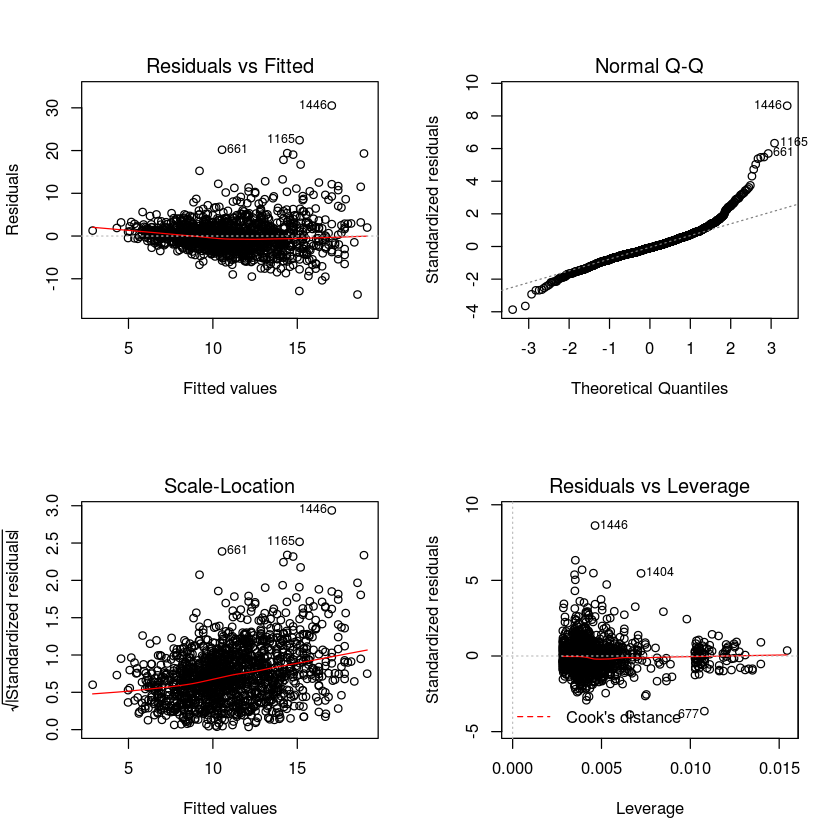

In [49]:
par(mfrow=c(2,2))
plot(model_1)

We have a first look graphically on the residuals, the top-left chart shows a little curvature of red smoothing line of the variance residuals, but not that much. However the bottom-left chart shows clearly that the residuals increase with the fitted values ! The heteroskedacity is surely present.
To check that, we may want to apply a GQ test

In [166]:
lmtest::gqtest(model_1)


	Goldfeld-Quandt test

data:  model_1
GQ = 2.0823, df1 = 729, df2 = 729, p-value < 2.2e-16
alternative hypothesis: variance increases from segment 1 to 2


There is significance at all levels (especially p-value $\approx 0$ << 0.05). So we reject the null hypothesis that the variance of the residuals is constant : heteroskedacity is present!

#### 17.

We want to take into account the correlation of the error with the actual model through the gender so we weight according to the gender :

In [233]:
bwages[bwages$male ==1,'war_wage'] = 1/var(bwages[bwages$male ==1, 'wage'])
bwages[bwages$male ==0,'war_wage'] = 1/var(bwages[bwages$male ==0, 'wage'])

In [315]:
model_wls <- lm(wage~male+educ1+educ2+educ3+educ4+exper,data=bwages, weights = bwages$war_wage)

In [316]:
summary(model_wls)


Call:
lm(formula = wage ~ male + educ1 + educ2 + educ3 + educ4 + exper, 
    data = bwages, weights = bwages$war_wage)

Weighted Residuals:
    Min      1Q  Median      3Q     Max 
-3.3567 -0.4385 -0.0738  0.3661  6.4461 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 10.393895   0.245262  42.379  < 2e-16 ***
male         1.318808   0.186654   7.066 2.47e-12 ***
educ1       -7.843770   0.424614 -18.473  < 2e-16 ***
educ2       -6.035818   0.298547 -20.217  < 2e-16 ***
educ3       -4.117057   0.256490 -16.052  < 2e-16 ***
educ4       -2.331682   0.262511  -8.882  < 2e-16 ***
exper        0.186406   0.009515  19.592  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8078 on 1465 degrees of freedom
Multiple R-squared:  0.3642,	Adjusted R-squared:  0.3616 
F-statistic: 139.9 on 6 and 1465 DF,  p-value: < 2.2e-16


In [317]:
lmtest::gqtest(model_wls)


	Goldfeld-Quandt test

data:  model_wls
GQ = 2.0823, df1 = 729, df2 = 729, p-value < 2.2e-16
alternative hypothesis: variance increases from segment 1 to 2


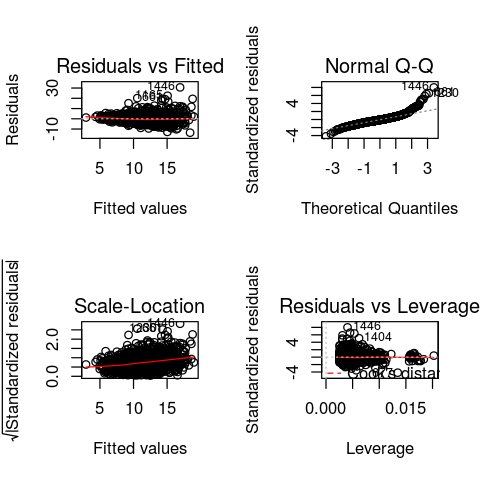

In [318]:
par(mfrow = c(2,2))
plot(model_wls)

#### 18.

We did not find a simple way to compute a White SE with R. So we use a code we have found to do it.

In [261]:
## Source : https://thetarzan.wordpress.com/2011/05/28/heteroskedasticity-robust-and-clustered-standard-errors-in-r/
## Heteroskedasticity-robust standard error calculation.
summaryw <- function(model) {
s <- summary(model)
X <- model.matrix(model)
u2 <- residuals(model)^2
XDX <- 0
 
## Here one needs to calculate X'DX. But due to the fact that
## D is huge (NxN), it is better to do it with a cycle.
for(i in 1:nrow(X)) {
XDX <- XDX + u2[i]*X[i,]%*%t(X[i,])
}
 
# inverse(X'X)
XX1 <- solve(t(X)%*%X)
 
# Variance calculation (Bread x meat x Bread)
varcovar <- XX1 %*% XDX %*% XX1
 
# degrees of freedom adjustment
dfc <- sqrt(nrow(X))/sqrt(nrow(X)-ncol(X))
 
# Standard errors of the coefficient estimates are the
# square roots of the diagonal elements
stdh <- dfc*sqrt(diag(varcovar))
 
t <- model$coefficients/stdh
p <- 2*pnorm(-abs(t))
results <- cbind(model$coefficients, stdh, t, p)
dimnames(results) <- dimnames(s$coefficients)
results
}

In [305]:
s = summary(model_1)
s = s$coefficients
compared = cbind(s[,2], as.vector(summaryw(model_1)[,2]))
colnames(compared) = c('Std Error', 'White Std Error')
compared

,Std Error,White Std Error
(Intercept),0.259946086,0.28465300
male,0.194696086,0.18868225
educ1,0.420968990,0.40874316
educ2,0.298744901,0.35342227
educ3,0.261643435,0.32962120
educ4,0.272184669,0.32396716
exper,0.009643716,0.01109283


White Std Error are generally higher in order to be more conservative about the rejection of the null hypothesis.

#### 19.

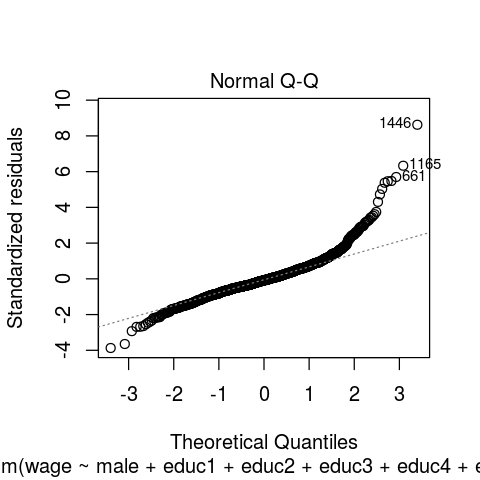

In [309]:
options(repr.plot.width=4, repr.plot.height=4)
plot(model_1, which = 2)

We can see that the residuals are clearly not following a Gaussian distribution. As seen before, it remains some unexplained variance in the residuals. We can try also a shapiro test:

In [310]:
 shapiro.test(model_1$residuals)


	Shapiro-Wilk normality test

data:  model_1$residuals
W = 0.90163, p-value < 2.2e-16


For a shapiro test,

* The null hypothesis is : $H_0$ : The sample is normally distributed

* The alternative hypothesis is : $H_1$ : The sample is not normally distributed

As p-value $\approx$ 0 << 0.05. So we reject the null hypothesis and we confirm the fact that the residuals are not normally distributed.

#### 20.